In [3]:
%run 0.connect_twitter.ipynb

my API Connected !


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h3>Gathering Data</h3><br>
Find 200 most recent tweets fom user @realDonaldTrump:

In [6]:
name = '@realDonaldTrump'
nbr_tweets = 400
results = myapi.user_timeline(id=name, count=nbr_tweets)

In [8]:
type(results)

tweepy.models.ResultSet

In [ ]:
data=[tweet.text for tweet in results]

In [13]:
data[-1]

'We are going to REBUILD our crumbling infrastructure, and there is no better place to begin this campaign than in t… https://t.co/5tbcDBRyqP'

Assemble the text into a dataframe

In [14]:
data = pd.DataFrame(data=[tweet.text for tweet in results],
                    columns=['Tweets'])

In [15]:
data.head()

,Tweets
0,Hard to believe Obstructionists May vote again...
1,Thank you to the incredible Law Enforcement Of...
2,"Kim Strassel of the WSJ just said, after revie..."
3,Funny how all of the Pundits that couldn’t com...
4,A complete Witch Hunt!


The interesting part from here is the quantity of metadata contained in a single tweet. If we want to obtain data such as the creation date, or the source of creation, we can access the info with this attributes. An example is the following:

In [21]:
results[-1].retweet_count

16632

In [116]:
print(dir(results[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


Getting the meta data from the first tweet in the lsit

In [22]:
print('id:',results[0].id)
print('created at:',results[0].created_at)
print('source:',results[0].source)
print('likes:',results[0].favorite_count)
print('retweets:',results[0].retweet_count)
print('geo-location:',results[0].geo)
print('message:',results[0].text)

id: 988405962624118785
created at: 2018-04-23 13:15:19
source: Twitter for iPhone
likes: 13779
retweets: 4041
geo-location: None
message: Hard to believe Obstructionists May vote against Mike Pompeo for Secretary of State. The Dems will not approve hund… https://t.co/ZElatyv8Fx


<h4>Adding more data to the dataframe </h4>

In [23]:
data['len']  = np.array([len(tweet.text) for tweet in results])
data['ID']   = np.array([tweet.id for tweet in results])
data['Date'] = np.array([tweet.created_at for tweet in results])
data['Source'] = np.array([tweet.source for tweet in results])
data['Likes']  = np.array([tweet.favorite_count for tweet in results])
data['RTs']    = np.array([tweet.retweet_count for tweet in results])

In [24]:
data.head()

,Tweets,len,ID,Date,Source,Likes,RTs
0,Hard to believe Obstructionists May vote again...,140,988405962624118785,2018-04-23 13:15:19,Twitter for iPhone,13779,4041
1,Thank you to the incredible Law Enforcement Of...,140,988148545545895937,2018-04-22 20:12:26,Twitter for iPhone,72276,13697
2,"Kim Strassel of the WSJ just said, after revie...",140,988146462625181696,2018-04-22 20:04:10,Twitter for iPhone,75225,20049
3,Funny how all of the Pundits that couldn’t com...,140,988126197619068928,2018-04-22 18:43:38,Twitter for iPhone,100339,24392
4,A complete Witch Hunt!,22,988106076028653568,2018-04-22 17:23:41,Twitter for iPhone,81436,17835


<h3>Interpretation of the data</h3>

In [26]:
likes_max = np.max(data['Likes'])
print(likes_max)
retweet_max  = np.max(data['RTs'])
print(retweet_max)

209172
66623


In [27]:
likes = data[data['Likes'] == likes_max].index[0]
print(likes)
retweets  = data[data.RTs == retweet_max].index[0]
print(retweets)

192
123


In [35]:
print(data.loc[123,:]['Tweets'])

Russia vows to shoot down any and all missiles fired at Syria. Get ready Russia,  because they will be coming, nice… https://t.co/tFXJAYDnOh


In [122]:
retweets

148

In [36]:
# Max FAVs:
print("The tweet with most likes is: \n{}".format(data['Tweets'][likes]))
print("Number of likes: {}".format(likes_max))
print("{} characters.".format(data['len'][likes]))
print("Tweeted at {s}".format(s=data['Date'][likes]))

The tweet with most likes is: 
HAPPY EASTER!
Number of likes: 209172
13 characters.
Tweeted at 2018-04-01 12:27:02


In [37]:
data.sort_values(by='Likes',ascending=False).head(4)

,Tweets,len,ID,Date,Source,Likes,RTs
192,HAPPY EASTER!,13,980421275326865409,2018-04-01 12:27:02,Twitter for iPhone,209172,41375
99,A perfectly executed strike last night. Thank ...,140,985130802668294144,2018-04-14 12:21:00,Twitter for iPhone,200066,43579
25,North Korea has agreed to suspend all Nuclear ...,140,987463564305797126,2018-04-20 22:50:34,Twitter for iPhone,183126,46868
135,When a car is sent to the United States from C...,140,983284198046826496,2018-04-09 10:03:16,Twitter for iPhone,176795,46829


<h3>Making Graphs</h3>

In [125]:
t_likes = pd.Series(data=data['Likes'].values, index=data['Date'])
type(t_likes)

pandas.core.series.Series

In [126]:
t_retweets = pd.Series(data=data['RTs'].values, index=data['Date'])

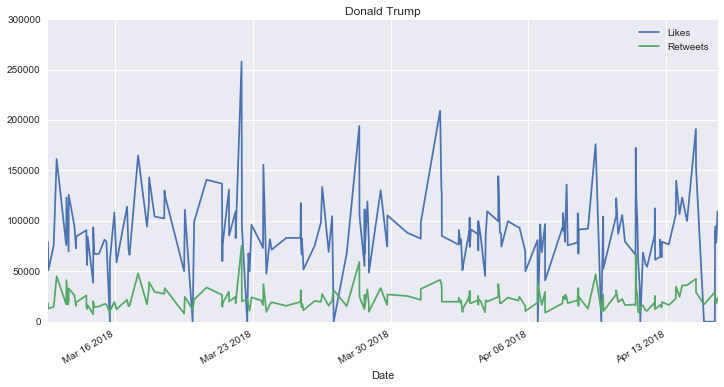

In [127]:
t_likes.plot(title='Donald Trump',
             figsize=(12,6),
             legend=True,
             label='Likes');
t_retweets.plot(legend=True,label='Retweets');

<h3>Sentiment Analysis of the Tweets</h3>

In [38]:
from textblob import TextBlob
import re

Define 2 different utility functions

In [45]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analyze_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    #analysis = TextBlob(clean_tweet(tweet))
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [46]:
txt = TextBlob('KU Leuven has  departments')
print('polarity',txt.sentiment.polarity)
print('subj',txt.sentiment.subjectivity)
analyze_sentiment('KU Leuven is great')

polarity 0.0
subj 0.0


1

In [47]:
x  = [ analyze_sentiment(tweet) for tweet in data['Tweets'] ]

In [48]:
data['SA'] = np.array(x)

In [49]:
data.sort_values(by='Date',ascending=False,inplace=True)
data.head()

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Hard to believe Obstructionists May vote again...,140,988405962624118785,2018-04-23 13:15:19,Twitter for iPhone,13779,4041,-1
1,Thank you to the incredible Law Enforcement Of...,140,988148545545895937,2018-04-22 20:12:26,Twitter for iPhone,72276,13697,1
2,"Kim Strassel of the WSJ just said, after revie...",140,988146462625181696,2018-04-22 20:04:10,Twitter for iPhone,75225,20049,-1
3,Funny how all of the Pundits that couldn’t com...,140,988126197619068928,2018-04-22 18:43:38,Twitter for iPhone,100339,24392,1
4,A complete Witch Hunt!,22,988106076028653568,2018-04-22 17:23:41,Twitter for iPhone,81436,17835,1


The time has to be removed from the date

In [51]:
data['Date']=data['Date'].apply(lambda x : pd.to_datetime(pd.to_datetime(x).strftime('%Y%m%d')))

In [52]:
df = data.groupby('Date').sum()

In [53]:
df.head()

,len,ID,Likes,RTs,SA
Date,,,,,
2018-03-29,420.0,2.938342e+18,254916.0,61920.0,1.0
2018-03-30,23.0,9.798168e+17,88149.0,25446.0,0.0
2018-03-31,419.0,2.940194e+18,270423.0,76662.0,-3.0
2018-04-01,385.0,3.921768e+18,554042.0,132024.0,-1.0
2018-04-02,1159.0,8.827173e+18,682359.0,167898.0,-3.0


In [54]:
df['mood']= df['SA'].rolling(window=5).apply(lambda x : np.sum(x))

In [56]:
df.tail()

,len,ID,Likes,RTs,SA,mood
Date,,,,,,
2018-04-19,1932.0,1.381812e+19,894421.0,226437.0,8.0,16.0
2018-04-20,1119.0,7.898660e+18,944927.0,237390.0,3.0,19.0
2018-04-21,1953.0,1.481568e+19,1041215.0,251542.0,3.0,24.0
2018-04-22,959.0,7.904691e+18,673026.0,154664.0,2.0,17.0
2018-04-23,140.0,9.884060e+17,13779.0,4041.0,-1.0,15.0


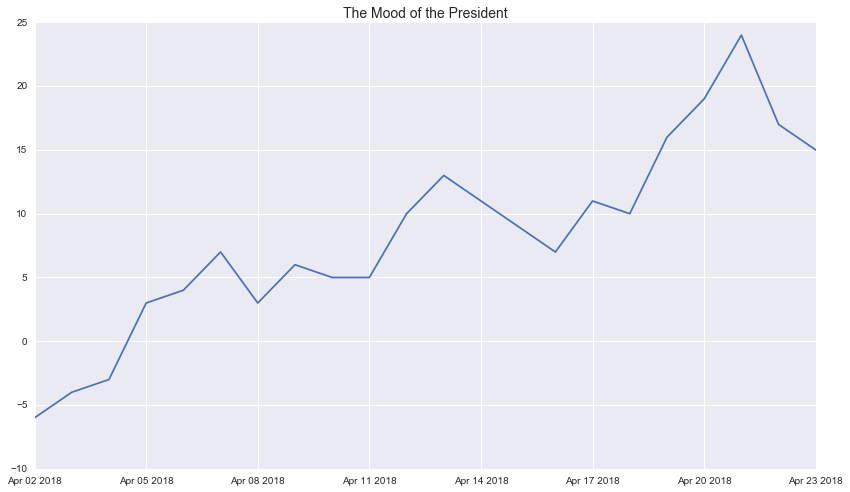

In [57]:
fig = plt.subplots(1,1,figsize=(14,8))
plt.plot(df.index,df['mood'])
plt.title('The Mood of the President',fontsize=14);

In [139]:
pos_tweets = [ tweet for index,tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [140]:
print(len(pos_tweets))
print(len(neu_tweets))
print(len(neg_tweets))

99
52
49


<h4>Most Liked positive tweet</h4>

In [141]:
df_positive = data[data['SA']>0].copy()
df_positive.sort_values(by='Likes',ascending=False,inplace=True)
df_positive.head()

,Tweets,len,ID,Date,Source,Likes,RTs,SA
104,HAPPY EASTER!,13,980421275326865409,2018-04-01,Twitter for iPhone,209538,41504,1
121,THE SECOND AMENDMENT WILL NEVER BE REPEALED! A...,140,978932860307505153,2018-03-28,Twitter for iPhone,194115,59183,1
11,A perfectly executed strike last night. Thank ...,140,985130802668294144,2018-04-14,Twitter for iPhone,191156,42658,1
35,Russia vows to shoot down any and all missiles...,140,984022625440747520,2018-04-11,Twitter for iPhone,172421,66938,1
169,"Andrew McCabe FIRED, a great day for the hard ...",140,974859881827258369,2018-03-17,Twitter for iPhone,164884,47925,1


In [145]:
df_positive.loc[169,['Tweets']]

Tweets    Andrew McCabe FIRED, a great day for the hard ...
Name: 169, dtype: object